# Predict estilo

Predict Estilo when having boca, tipo varideades, zona de producción

In [1]:
import pandas as pd
from pandasgui import show
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from keras.models import Sequential
from keras.layers import Dense

## Load the data

In [17]:
X_ITEMS_PATH = r"../EDA/X_pred_estilo.csv"
Y_ITEMS_PATH = r"../EDA/y_pred_estilo.csv"

X = pd.read_csv(X_ITEMS_PATH)
y = pd.read_csv(Y_ITEMS_PATH)

In [18]:
X.shape

(240, 71)

In [19]:
y.shape

(240, 30)

## Split the data into train and test

In [1]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X")
print(X_train.shape)
print(X_test.shape)

print("Y")
print(y_train.shape)
print(y_test.shape)

NameError: name 'X' is not defined

## Create the NN architecture

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=71, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(21, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                231       
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

In [10]:
history = model.fit(X_train,y_train, epochs=60,validation_split=.1)

Epoch 1/60
5/5 [==============================] - 1s 37ms/step - loss: 0.6927 - categorical_accuracy: 0.0000e+00 - val_loss: 0.6840 - val_categorical_accuracy: 0.0000e+00
Epoch 2/60
5/5 [==============================] - 0s 9ms/step - loss: 0.6863 - categorical_accuracy: 0.0000e+00 - val_loss: 0.6778 - val_categorical_accuracy: 0.0000e+00
Epoch 3/60
5/5 [==============================] - 0s 14ms/step - loss: 0.6800 - categorical_accuracy: 0.0000e+00 - val_loss: 0.6712 - val_categorical_accuracy: 0.0588
Epoch 4/60
5/5 [==============================] - 0s 10ms/step - loss: 0.6734 - categorical_accuracy: 0.0203 - val_loss: 0.6639 - val_categorical_accuracy: 0.0588
Epoch 5/60
5/5 [==============================] - 0s 10ms/step - loss: 0.6664 - categorical_accuracy: 0.0270 - val_loss: 0.6554 - val_categorical_accuracy: 0.0588
Epoch 6/60
5/5 [==============================] - 0s 9ms/step - loss: 0.6584 - categorical_accuracy: 0.0473 - val_loss: 0.6460 - val_categorical_accuracy: 0.1176
Epoc

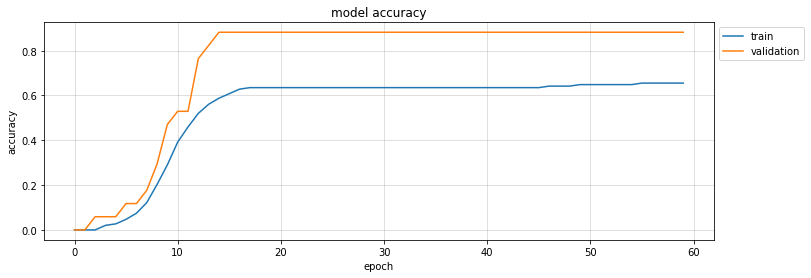

In [11]:
plt.figure(figsize=(12,4))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(alpha=.5)
plt.show()

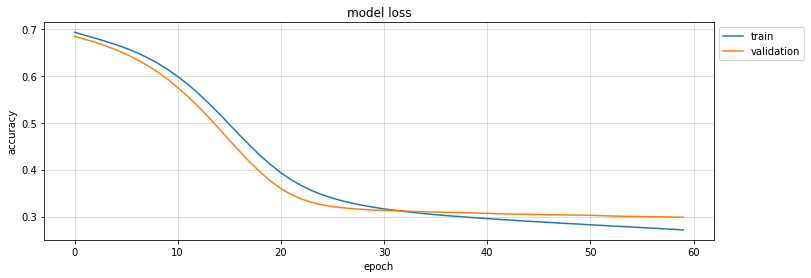

In [12]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(alpha=.5)
plt.show()

In [13]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.2905 - categorical_accuracy: 0.6429


[0.2905213534832001, 0.6428571343421936]

## NN Inference

In [14]:
x_cols = X_train.columns.values
y_cols = y_train.columns.values

def translate_array(input_array, dict, output=False,acceptance=.5):
    if output:
        input_array = input_array > acceptance 
    indices = np.flatnonzero(input_array)
    final_array = []
    for index in indices:
        final_array.append(dict[index])
    return final_array



In [15]:
def show_results(model,X,y,samples=4):

    for _ in range(samples):

        index = random.randint(0,X.shape[0])
        print("For a wine that is:")
        print(translate_array(X.values[index].reshape((1,-1)),x_cols))
        print("and we should get that the style is:")
        print(translate_array(y.values[index],y_cols,output=True))
        print("Using the model we get:")
        print(translate_array(model.predict(X.values[index].reshape((1,-1))),y_cols,output=True))
        print("-----------")

In [16]:
show_results(model,X_test,y_test,samples=10)

For a wine that is:
['buena acidez', 'fruta madura', 'taninos maduros', 'tinto', 'garnacha', 'cariñena', 'merlot', 'fruta madura.1', 'hierbas secas', 'fruta negra', 'roble cremoso', 'terroso', 'cereza intenso']
and we should get that the style is:
['frutal', 'herbal']
Using the model we get:
['sabroso']
-----------
For a wine that is:
['sabroso', 'buena acidez', 'fruta madura', 'tinto', 'garnacha', 'cariñena', 'fruta madura.1', 'fruta roja', 'hierbas silvestres', 'cereza brillante']
and we should get that the style is:
['sabroso', 'herbal', 'sencillo']
Using the model we get:
['sabroso']
-----------
For a wine that is:
['sabroso', 'buena acidez', 'fruta madura', 'burbuja fina', 'espumoso', 'xarel.lo', 'chardonnay', 'fruta madura.1', 'hierbas de tocador', 'frutos secos', 'con carácter', 'dorado brillante']
and we should get that the style is:
['sabroso', 'frutal']
Using the model we get:
['sabroso']
-----------
For a wine that is:
['sabroso', 'buena acidez', 'burbuja fina', 'espumoso', 

## Catboost

In [24]:
from catboost import CatBoostClassifier